# Data Analysis
---

In [30]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

### Load data files

Note to self: ask Wu-Jung and/or Don which CTD and METBK variables I should actually be using. There are raw measurements with specified fill values, and there are qc versions that might be better to work with.

In [4]:
METBK_data = pd.read_csv('../../coastal_upwelling_output/metbk_data.csv')
profiler_data = pd.read_csv('../../coastal_upwelling_output/profiler_data.csv')
platform_data = pd.read_csv('../../coastal_upwelling_output/platform_data.csv')

In [6]:
# Specify the variable(s) of interest
METBK_var = ['sea_surface_temperature', 'met_windavg_mag_corr_east', 'met_windavg_mag_corr_north']
profiler_var = ['seawater_pressure', 'density', 'practical_salinity', 'seawater_temperature', 'corrected_dissolved_oxygen']
platform_var = ['seawater_pressure', 'density', 'practical_salinity', 'seawater_temperature', 'dissolved_oxygen']

In [7]:
# Specify the units for each variable of interest
METBK_units = {'sea_surface_temperature': ['ºC'], 'met_windavg_mag_corr_east': ['m s-1'], 'met_windavg_mag_corr_north': ['m s-1']}
profiler_units = {'seawater_pressure': ['dbar'], 'density': ['kg m-3'], 'practical_salinity': ['1'], 'seawater_temperature': ['ºC'], 'corrected_dissolved_oxygen': ['µmol kg-1']}
platform_units = {'seawater_pressure': ['dbar'], 'density': ['kg m-3'], 'practical_salinity': ['1'], 'seawater_temperature': ['ºC'], 'dissolved_oxygen': ['µmol kg-1']}

### Inspect the data
Let's see how much data we have...

In [8]:
print(METBK_data.shape)
print(profiler_data.shape)
print(platform_data.shape)

(485137, 4)
(21517483, 6)
(21413155, 6)


Lots of observations!!! We can resample the data into lower resolution later so that we aren't feeding 20M observations to our visaulizations.

See what the data looks like:

In [9]:
METBK_data

time  sea_surface_temperature  \
0       2017-01-01 00:00:30.432000000                   11.273   
1       2017-01-01 00:01:37.298999808                   11.268   
2       2017-01-01 00:02:41.522000384                   11.267   
3       2017-01-01 00:03:46.300000256                   11.267   
4       2017-01-01 00:04:50.525000192                   11.278   
...                               ...                      ...   
485132  2017-12-01 18:28:40.451000320                   12.053   
485133  2017-12-01 18:29:44.697999872                   12.053   
485134  2017-12-01 18:30:16.942000128                   12.052   
485135  2017-12-01 18:31:21.691999744                   12.052   
485136  2017-12-01 18:32:26.453000192                   12.052   

        met_windavg_mag_corr_east  met_windavg_mag_corr_north  
0                    4.095093e+00               -7.196688e+00  
1                    6.134961e+00               -5.290137e+00  
2                    4.501072e+00               -4.933199e+00  
3                    3.296377e+00               -4.787901e+00  
4                    4.516634e+00               -4.688541e+00  
...                           ...                         ...  
485132              -1.228042e+07               -7.013654e+06  
485133              -1.228042e+07               -7.013654e+06  
485134              -1.228042e+07               -7.013654e+06  
485135              -1.228042e+07               -7.013654e+06  
485136              -1.228042e+07               -7.013654e+06  

[485137 rows x 4 columns]

In [10]:
profiler_data

time  seawater_pressure      density  \
0         2017-01-01 00:00:00.317937152         200.479041  1027.353099   
1         2017-01-01 00:00:01.318152192         200.473701  1027.353005   
2         2017-01-01 00:00:02.318157312         200.467264  1027.352763   
3         2017-01-01 00:00:03.317954560         200.465142  1027.352876   
4         2017-01-01 00:00:04.318168576         200.466196  1027.352835   
...                                 ...                ...          ...   
21517478  2017-09-16 12:13:36.480951808          55.887428  1026.093423   
21517479  2017-09-16 12:13:37.480647680          55.495146  1026.091836   
21517480  2017-09-16 12:13:38.480967680          55.449183  1026.101359   
21517481  2017-09-16 12:13:39.480977408          55.550728  1026.101385   
21517482  2017-09-16 12:13:40.481089536          55.674719  1026.098354   

          practical_salinity  seawater_temperature  corrected_dissolved_oxygen  
0                  33.886699              7.785772                  106.590066  
1                  33.886692              7.786201                  106.566439  
2                  33.886432              7.786262                  106.633814  
3                  33.886519              7.785895                  106.511052  
4                  33.886425              7.785711                  106.702620  
...                      ...                   ...                         ...  
21517478           33.515015              9.740724                  174.247648  
21517479           33.513691              9.733299                  174.247264  
21517480           33.524510              9.725553                  174.128022  
21517481           33.524760              9.729361                  174.092489  
21517482           33.521308              9.734784                  174.033241  

[21517483 rows x 6 columns]

In [11]:
platform_data

time  seawater_pressure      density  \
0         2017-01-01 00:00:00.358334464         174.119526  1027.258302   
1         2017-01-01 00:00:01.358341632         174.116325  1027.258472   
2         2017-01-01 00:00:02.358451712         174.112055  1027.258521   
3         2017-01-01 00:00:03.358353408         174.110987  1027.258479   
4         2017-01-01 00:00:04.359924736         174.109920  1027.258647   
...                                 ...                ...          ...   
21413150  2017-09-16 12:13:36.463305728         106.267688  1026.694767   
21413151  2017-09-16 12:13:37.463519744         105.983047  1026.693119   
21413152  2017-09-16 12:13:38.463524352         105.822521  1026.692393   
21413153  2017-09-16 12:13:39.464573440         105.612742  1026.691110   
21413154  2017-09-16 12:13:40.463225344         105.642707  1026.690872   

          practical_salinity  seawater_temperature  dissolved_oxygen  
0                  33.916341              7.767863        243.229175  
1                  33.916495              7.767433        243.231825  
2                  33.916536              7.767187        243.229405  
3                  33.916442              7.766941        243.233222  
4                  33.916615              7.766695        243.229099  
...                      ...                   ...               ...  
21413150           33.802832              8.837725        141.039036  
21413151           33.802465              8.838104        141.052233  
21413152           33.802463              8.838041        141.071164  
21413153           33.802138              8.838483        141.042114  
21413154           33.801812              8.839241        141.060716  

[21413155 rows x 6 columns]

We can see that the profiler and platform data actually cut off at 2017-09-16 instead of covering the entire year of 2017, but the surface mooring data goes until 2017-12-01!

Do a simple `.describe()`

In [12]:
METBK_data.describe()

sea_surface_temperature  met_windavg_mag_corr_east  \
count            485137.000000               4.671560e+05   
mean                 12.504472              -1.806753e+05   
std                   1.816724               1.478567e+06   
min                   9.854000              -1.228062e+07   
25%                  10.622000              -8.175190e-01   
50%                  12.163000               8.225444e-01   
75%                  14.158000               2.683002e+00   
max                  17.580999               1.502310e+01   

       met_windavg_mag_corr_north  
count                4.671560e+05  
mean                -1.031858e+05  
std                  8.444168e+05  
min                 -7.013654e+06  
25%                 -5.188641e+00  
50%                 -1.676100e+00  
75%                  3.312628e+00  
max                  2.124346e+01

In [13]:
METBK_data.isna().sum()

time                              0
sea_surface_temperature           0
met_windavg_mag_corr_east     17981
met_windavg_mag_corr_north    17981
dtype: int64

I actually didn't expect to see nulls here, I thought they'd all be filled in with some standard. Will have to decide how to best fill or drop those later.

In [14]:
profiler_data.describe()

seawater_pressure       density  practical_salinity  \
count       2.151748e+07  2.151748e+07        2.151748e+07   
mean        1.892278e+02  1.027229e+03        3.382338e+01   
std         3.956323e+01  4.486180e-01        2.838685e-01   
min         1.355533e+01  1.021795e+03        2.668256e+01   
25%         2.026819e+02  1.027237e+03        3.384952e+01   
50%         2.037541e+02  1.027362e+03        3.390711e+01   
75%         2.044697e+02  1.027462e+03        3.394010e+01   
max         2.906436e+02  1.027943e+03        3.402038e+01   

       seawater_temperature  corrected_dissolved_oxygen  
count          2.151748e+07                2.151748e+07  
mean           7.923279e+00                1.032202e+02  
std            7.240315e-01                2.854860e+01  
min            6.647794e+00                3.493388e+01  
25%            7.368913e+00                8.760923e+01  
50%            7.839711e+00                1.002137e+02  
75%            8.267647e+00                1.125449e+02  
max            1.545517e+01                3.261326e+02

In [15]:
profiler_data.isna().sum()

time                          0
seawater_pressure             0
density                       0
practical_salinity            0
seawater_temperature          0
corrected_dissolved_oxygen    0
dtype: int64

No nulls because they've already been filled with designated values. I'll need to check the data URLs and OPeNDAP server info to find out what the fill value is for each individual variable so I can decide how to remove these filled values later. Will probably go back to that function that fills zeros. 

In [16]:
platform_data.describe()

seawater_pressure       density  practical_salinity  \
count       2.141316e+07  2.141316e+07        2.141316e+07   
mean        1.775616e+02  1.027285e+03        3.393058e+01   
std         7.559369e+00  1.262370e-01        6.137423e-02   
min         1.056127e+02  1.021026e+03        2.586172e+01   
25%         1.737436e+02  1.027198e+03        3.390456e+01   
50%         1.744528e+02  1.027308e+03        3.394598e+01   
75%         1.751459e+02  1.027386e+03        3.397203e+01   
max         3.934706e+02  1.028526e+03        3.413850e+01   

       seawater_temperature  dissolved_oxygen  
count          2.141316e+07      2.141316e+07  
mean           7.758619e+00      2.158851e+02  
std            4.767823e-01      5.748281e+01  
min            6.591365e+00      5.674305e+01  
25%            7.340232e+00      2.378987e+02  
50%            7.733933e+00      2.415788e+02  
75%            8.106266e+00      2.437993e+02  
max            9.196944e+00      4.506413e+02

In [17]:
platform_data.isna().sum()

time                    0
seawater_pressure       0
density                 0
practical_salinity      0
seawater_temperature    0
dissolved_oxygen        0
dtype: int64

---
# METBK data

The bulk meteorology package sits on a surface mooring and collects meteorological data and sea surface measurements. This is great! We want to look at wind data because coastal upwelling is a wind-driven process, and we also want to look at how variables at the sea surface change. Luckily, this package has it all! 

In [18]:
METBK_data['time']

0         2017-01-01 00:00:30.432000000
1         2017-01-01 00:01:37.298999808
2         2017-01-01 00:02:41.522000384
3         2017-01-01 00:03:46.300000256
4         2017-01-01 00:04:50.525000192
                      ...              
485132    2017-12-01 18:28:40.451000320
485133    2017-12-01 18:29:44.697999872
485134    2017-12-01 18:30:16.942000128
485135    2017-12-01 18:31:21.691999744
485136    2017-12-01 18:32:26.453000192
Name: time, Length: 485137, dtype: object

The time column is full of strings so we need to convert them to datetimes for plotting and resampling.

In [19]:
METBK_data['time'] = pd.to_datetime(METBK_data['time'])

In [20]:
METBK_data['time']

0        2017-01-01 00:00:30.432000000
1        2017-01-01 00:01:37.298999808
2        2017-01-01 00:02:41.522000384
3        2017-01-01 00:03:46.300000256
4        2017-01-01 00:04:50.525000192
                      ...             
485132   2017-12-01 18:28:40.451000320
485133   2017-12-01 18:29:44.697999872
485134   2017-12-01 18:30:16.942000128
485135   2017-12-01 18:31:21.691999744
485136   2017-12-01 18:32:26.453000192
Name: time, Length: 485137, dtype: datetime64[ns]

We have to repeat this for the other datasets too.

In [21]:
profiler_data['time'] = pd.to_datetime(profiler_data['time'])
platform_data['time'] = pd.to_datetime(platform_data['time'])

Generate a quick plot of the northward wind velocity data.

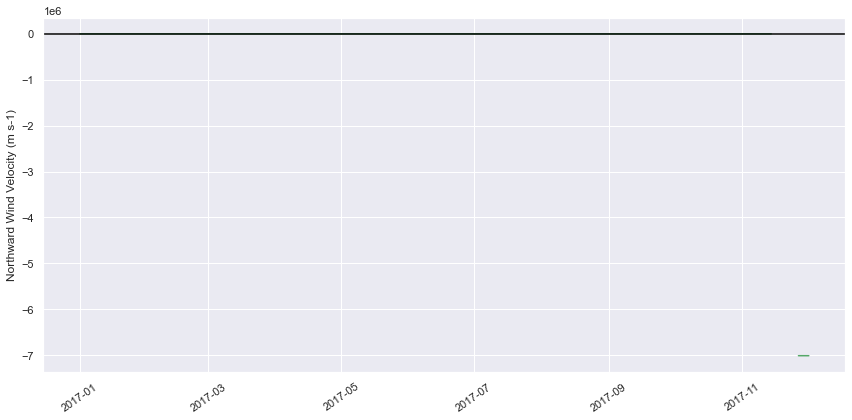

In [24]:
fig, ax = plt.subplots(1,1, sharex=True, figsize = (12, 6)) 

ax.plot(METBK_data['time'], METBK_data['met_windavg_mag_corr_north'], 'g')
ax.set_xlabel('')
ax.set_ylabel('Northward Wind Velocity ({})'.format(METBK_units['met_windavg_mag_corr_north'][0]))
ax.axhline(y=0, ls='-', c='black') # add horizontal line at 0

plt.xticks(rotation=35);
plt.tight_layout()

This plot is so empty! I think the last couple weeks of this data is funky, so let's slice is out for now and plot the rest.

In [25]:
mask = (METBK_data['time'][:] > '2017-01-01') & (METBK_data['time'] <= '2017-11-15')
METBK_data = METBK_data.loc[mask]

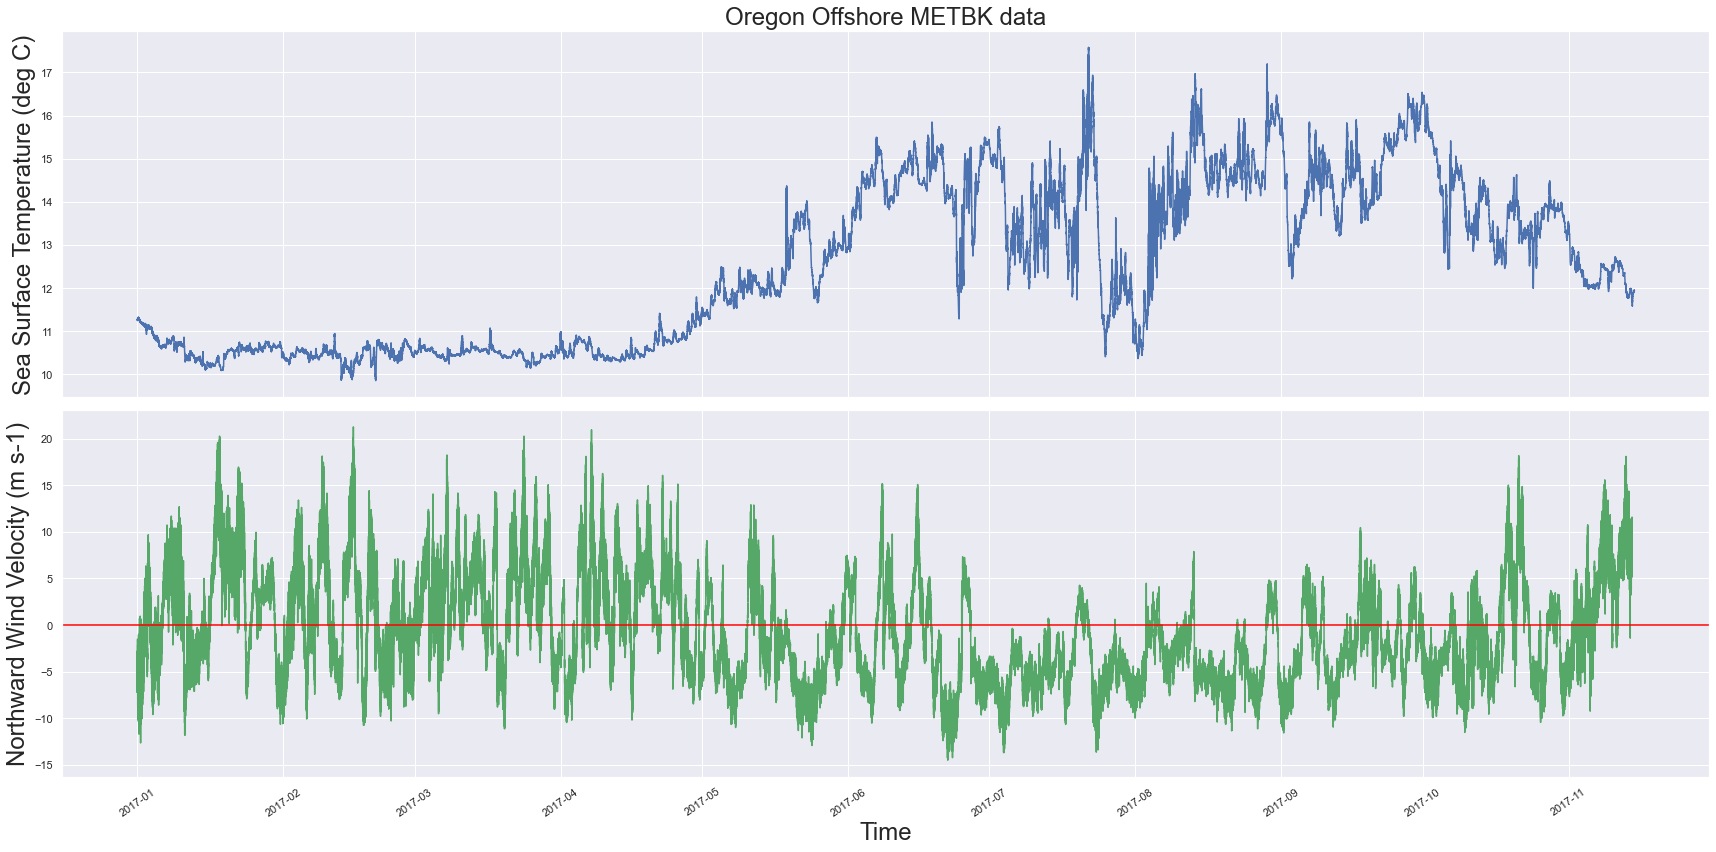

In [26]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize = (24, 12)) 
ax1.plot(METBK_data['time'], METBK_data['sea_surface_temperature'], 'b')
ax1.set_ylabel('Sea Surface Temperature (deg C)', size=24)
ax1.set_title('Oregon Offshore METBK data', size=24)

ax2.plot(METBK_data['time'], METBK_data['met_windavg_mag_corr_north'], 'g')
ax2.set_xlabel('Time', size=24)
ax2.set_ylabel('Northward Wind Velocity ({})'.format(METBK_units['met_windavg_mag_corr_north'][0]), size=24)
ax2.axhline(y=0, ls='-', c='red') # add horizontal line at 0

plt.xticks(rotation=35);
plt.tight_layout()
plt.savefig('../figures/METBK_SST_NWind.png')

That looks much better! The upper subplot shows sea surface tempreature (SST) measurements throughout the year, and the lower subplot shows the northward wind velocity. The red horizontal line represents a northward velocity of 0. When the green line is above 0, the wind is blowing to the North, and when it's below 0 the wind is blowing to the South. Southward blowing winds cause upwelling of cold waters in this environment, so we expect to see a decrease in sea surface temperatures when the northward wind velocity is negative.

Notice how cold and stable the temperature is in the winter months, keeping between ~10 and ~11 degrees C. The sea surface begins warming up in late April and May, and is considerably warmer in the summer months. 

Next, notice how irregular the temperature is in the summer months - this is probably due to the seasonal upwelling we're looking for! The northward wind velocity is often positive in winter and spring months and often negative in summer and fall months. What we're hoping to see here is that **extended periods of negative northward wind velocities are followed by a sharp spike downward in the SST.** See if you can find spots like that in the plot above!

Keep in mind that northward wind velocity is not a perfect indicator of upwelling and that we'll need to use an official upwelling index to label our data for modeling. More on this later in the notebook.

This data has a super high temporal resolution (something to be grateful for) but we can resample it to hourly and daily means by chaining some functions. Resampling the CTD data will be more important than the METBK data, but I'll do it here anyway for consistency.

In [27]:
METBK_hourly = METBK_data.resample('H', on='time').mean().dropna(how='all').reset_index()
METBK_hourly

time  sea_surface_temperature  met_windavg_mag_corr_east  \
0    2017-01-01 00:00:00                11.268333                   4.348728   
1    2017-01-01 01:00:00                11.264600                   4.470534   
2    2017-01-01 02:00:00                11.257867                   5.828099   
3    2017-01-01 03:00:00                11.252350                   5.794522   
4    2017-01-01 04:00:00                11.271867                   6.989749   
...                  ...                      ...                        ...   
7627 2017-11-14 19:00:00                11.903050                        NaN   
7628 2017-11-14 20:00:00                11.901317                        NaN   
7629 2017-11-14 21:00:00                11.918254                        NaN   
7630 2017-11-14 22:00:00                11.942672                        NaN   
7631 2017-11-14 23:00:00                11.940667                        NaN   

      met_windavg_mag_corr_north  
0                      -5.135321  
1                      -4.484457  
2                      -4.564354  
3                      -7.796951  
4                      -6.915843  
...                          ...  
7627                         NaN  
7628                         NaN  
7629                         NaN  
7630                         NaN  
7631                         NaN  

[7632 rows x 4 columns]

In [28]:
METBK_daily = METBK_data.resample('D', on='time').mean().dropna(how='all').reset_index()
METBK_daily

time  sea_surface_temperature  met_windavg_mag_corr_east  \
0   2017-01-01                11.247412                   6.413056   
1   2017-01-02                11.149430                  -1.148830   
2   2017-01-03                11.089363                  -5.203772   
3   2017-01-04                10.926763                  -6.222477   
4   2017-01-05                10.756387                  -6.911579   
..         ...                      ...                        ...   
313 2017-11-10                12.468681                  -0.408066   
314 2017-11-11                12.591080                   0.274552   
315 2017-11-12                12.417127                  -0.501287   
316 2017-11-13                11.889144                   4.022042   
317 2017-11-14                11.876774                   3.936518   

     met_windavg_mag_corr_north  
0                     -5.371468  
1                     -1.207261  
2                      2.533484  
3                     -4.027738  
4                     -3.048631  
..                          ...  
313                    4.630594  
314                    4.486309  
315                    8.977260  
316                   10.856365  
317                    6.797973  

[318 rows x 4 columns]

The resulting dataframes are much smaller, which will speed up plotting.

We can quickly calculate the percentage of time in 2017 that winds are blowing towards the south and get an idea of how much of the year might see favorable conditions for upwelling. Again, northward wind velocity is not the only indicator of upwelling conditions, we'll need to look at a calculated index for that later.

In [31]:
north_winds = np.array(METBK_hourly['met_windavg_mag_corr_north'])
upwelling_percentage = len(north_winds[north_winds < 0]) / len(north_winds) * 100
print('{}%'.format(round(upwelling_percentage)))

58%


Winds are blowing from North to South for about 58% of our time period! We should repeat this with our upwelling index, too.

### Summer months

We can zoom in on just a few months worth of data to get a closer look at negative northward wind velocities and downward spikes in sea surface temperature.

In [32]:
# Grab times of interest
mask = (METBK_hourly['time'][:] > '2017-04-01') & (METBK_hourly['time'] <= '2017-08-01')
METBK_summer_data = METBK_hourly.loc[mask]

METBK_summer_data.head()

time  sea_surface_temperature  met_windavg_mag_corr_east  \
2161 2017-04-01 01:00:00                10.822590                   0.803592   
2162 2017-04-01 02:00:00                10.635898                   0.310431   
2163 2017-04-01 03:00:00                10.660164                   1.038492   
2164 2017-04-01 04:00:00                10.632017                   0.945587   
2165 2017-04-01 05:00:00                10.704410                   0.654626   

      met_windavg_mag_corr_north  
2161                   -2.903407  
2162                   -2.673502  
2163                   -2.400807  
2164                   -2.576699  
2165                   -2.115579

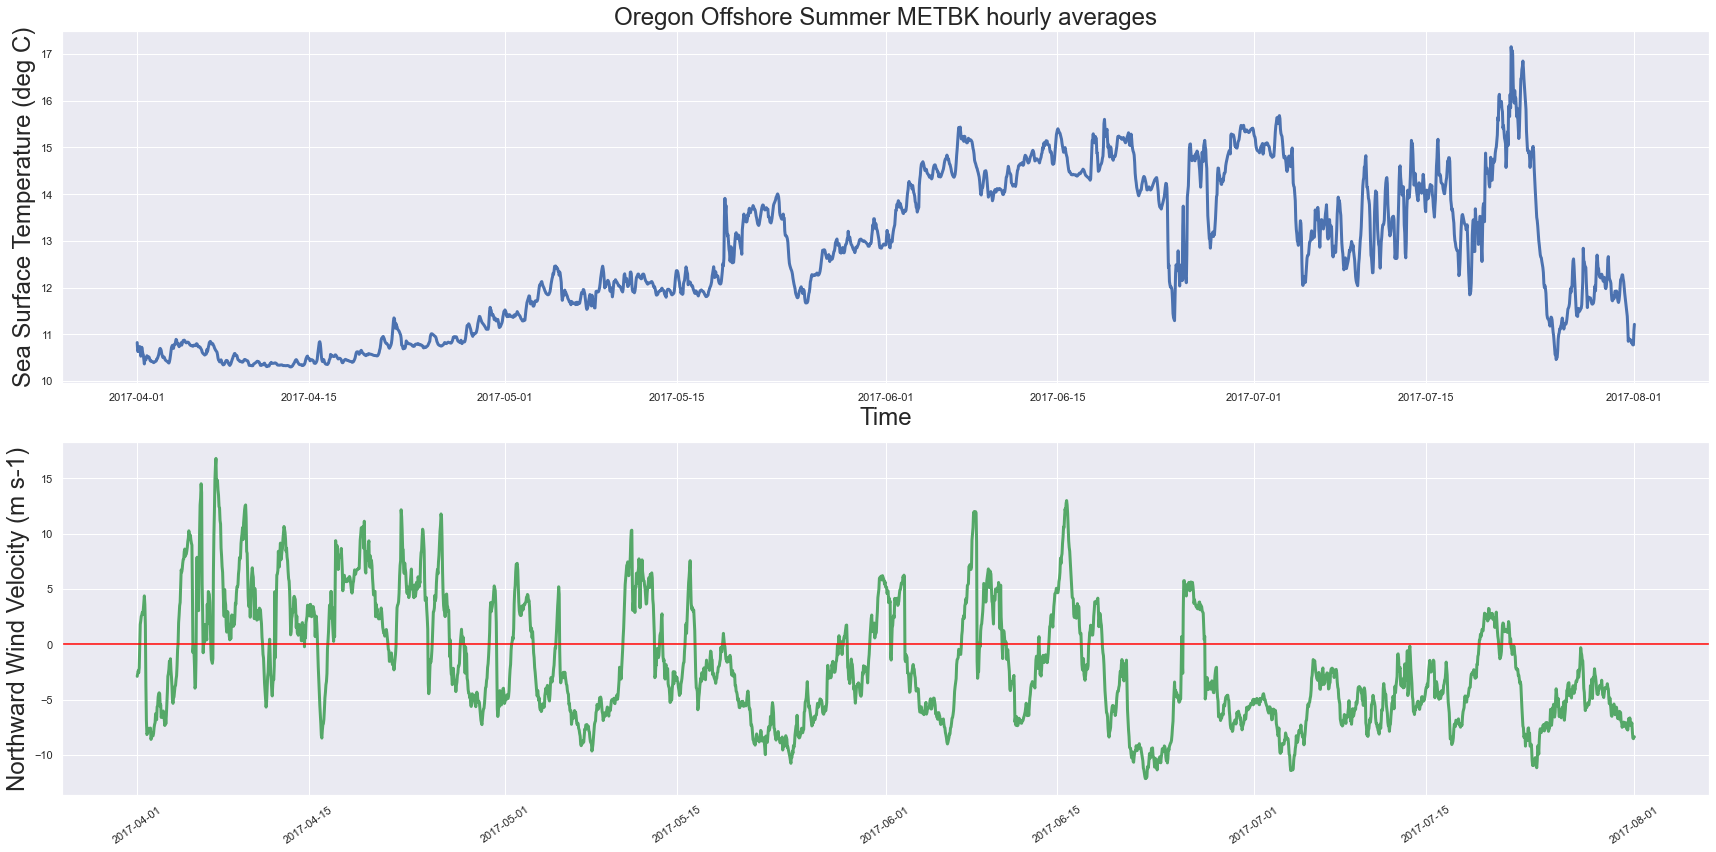

In [33]:
fig, (ax, ax2) = plt.subplots(2,1, figsize=(24, 12))

#ax2 = ax.twinx()  # instantiate a second axis that shares the same x-axis
ax.plot(METBK_summer_data['time'], METBK_summer_data['sea_surface_temperature'], 'b', linewidth=3)
ax.set_ylabel('Sea Surface Temperature (deg C)', size=24)
ax.set_xlabel('Time', size=24)

ax2.plot(METBK_summer_data['time'], METBK_summer_data['met_windavg_mag_corr_north'], 'g', linewidth=3)
ax2.set_ylabel('Northward Wind Velocity (m s-1)', size=24)
plt.xticks(rotation=35)

ax2.axhline(y=0, ls='-', c='red') # add horizontal line at 0
ax.set_title('Oregon Offshore Summer METBK hourly averages', size=24);

plt.tight_layout()
plt.savefig('../figures/METBK_SST_NWind_summer.png')

Is it easier to see the connection between wind velocity and sea surface temperature now? There's a bit of a lag in time between southward blowing winds and colder temperature measurements. The relationship will be more clear when we look at the upwelling index later. 

---
# Profiler data
Time to look at the CTD data collected by the shallow profiler! The profiler we're using goes up and down in the water column on a wire, from ~20 meters to ~200 meters, 9 times a day. This will give us a better picture of how the water column changes in upwelling conditions than the surface mooring holding the bulk meteorology (METBK) package.

Ever tried plotting 20M observations? Neither have I, and I don't want to start now! We can resample the CTD data to a 1 minute scale, an hourly scale, and a daily scale. I have lots of questions about whether or not this is really a good idea though. If the profiler is moving up and down through the water column on a schedule, then looking at resampled data could actually give us an incorrect impression of the temperature patterns in the water column. This is something I need to come back to later; for now, let's resample and continue on.

In [34]:
profiler_data['time']

0          2017-01-01 00:00:00.317937152
1          2017-01-01 00:00:01.318152192
2          2017-01-01 00:00:02.318157312
3          2017-01-01 00:00:03.317954560
4          2017-01-01 00:00:04.318168576
                        ...             
21517478   2017-09-16 12:13:36.480951808
21517479   2017-09-16 12:13:37.480647680
21517480   2017-09-16 12:13:38.480967680
21517481   2017-09-16 12:13:39.480977408
21517482   2017-09-16 12:13:40.481089536
Name: time, Length: 21517483, dtype: datetime64[ns]

In [35]:
profiler_minutes = profiler_data.resample('T', on='time').mean().dropna(how='all').reset_index()
METBK_minutes = METBK_data.resample('T', on='time').mean().dropna(how='all').reset_index()
# profiler_minutes.head()

profiler_hourly = profiler_data.resample('H', on='time').mean().dropna(how='all').reset_index()
# profiler_hourly.head()

profiler_daily = profiler_data.resample('D', on='time').mean().dropna(how='all').reset_index()
# profiler_daily.head()

Now we can see how the profiler data looks:

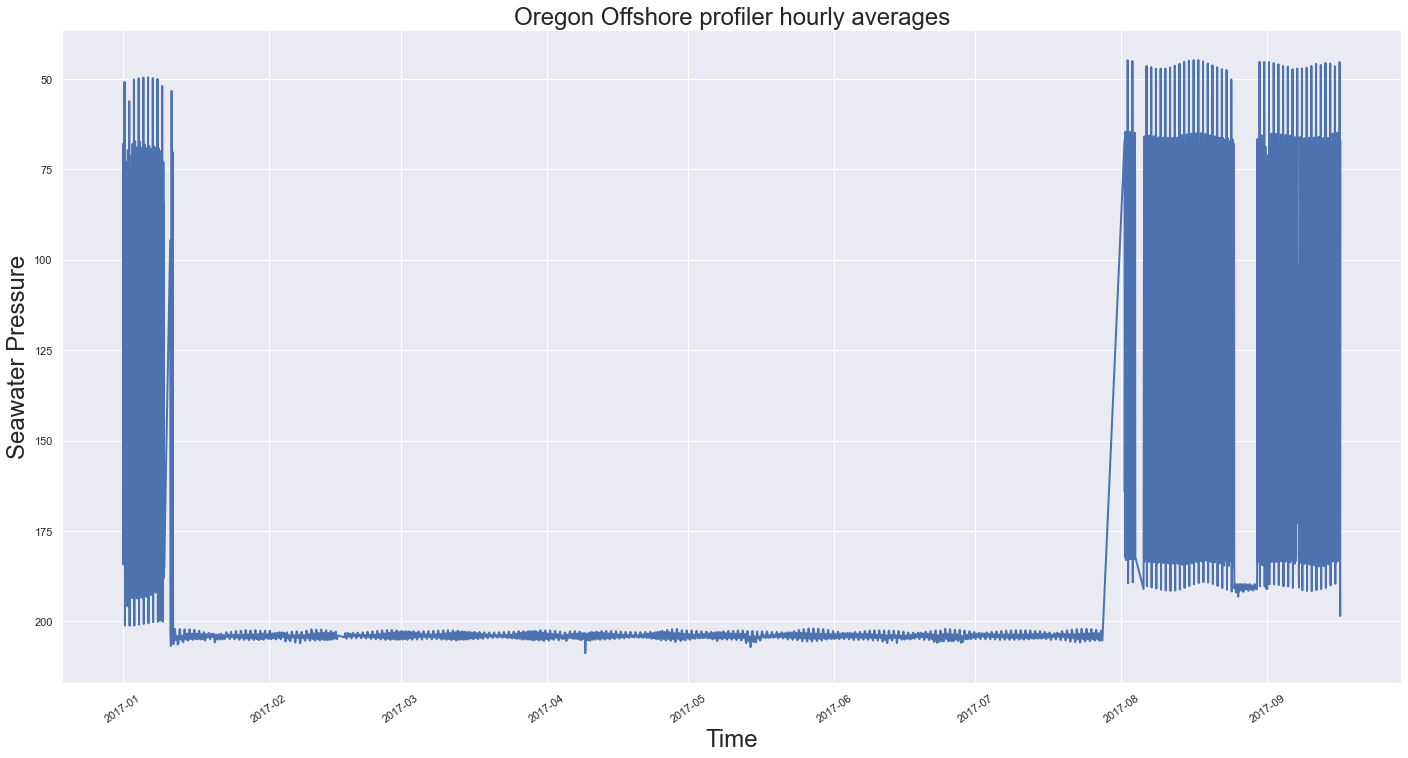

In [36]:
# Plot hourly-averaged METBK data
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(24, 12))
ax.plot(profiler_hourly['time'], profiler_hourly['seawater_pressure'], 'b', linewidth=2)
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

You might be wondering what you're looking at here. Like I said, the profiler goes up and down in the water column, so I plotted seawater pressure (near equivalent to depth) on the y-axis. Unfortunately, it looks like the profiler got stuck at ~200 meters for about 6 months in 2017 and wasn't able to move up and down in the water column like normal. I wonder if the 2018 data is any better? We can opt out of using the profiler data in the modeling, but let's still explore it before we move on to the platform data.

To give you a better idea of what the profiler is doing, I'm going to select 5 days of data to plot.

In [37]:
mask = (profiler_data['time'][:] > '2017-08-20') & (profiler_data['time'] <= '2017-08-25')
profiler_week = profiler_data.loc[mask]

profiler_week.shape

(431988, 6)

Even 5 days of data is still almost half a million observations, wow! The cell below will take a few seconds to run

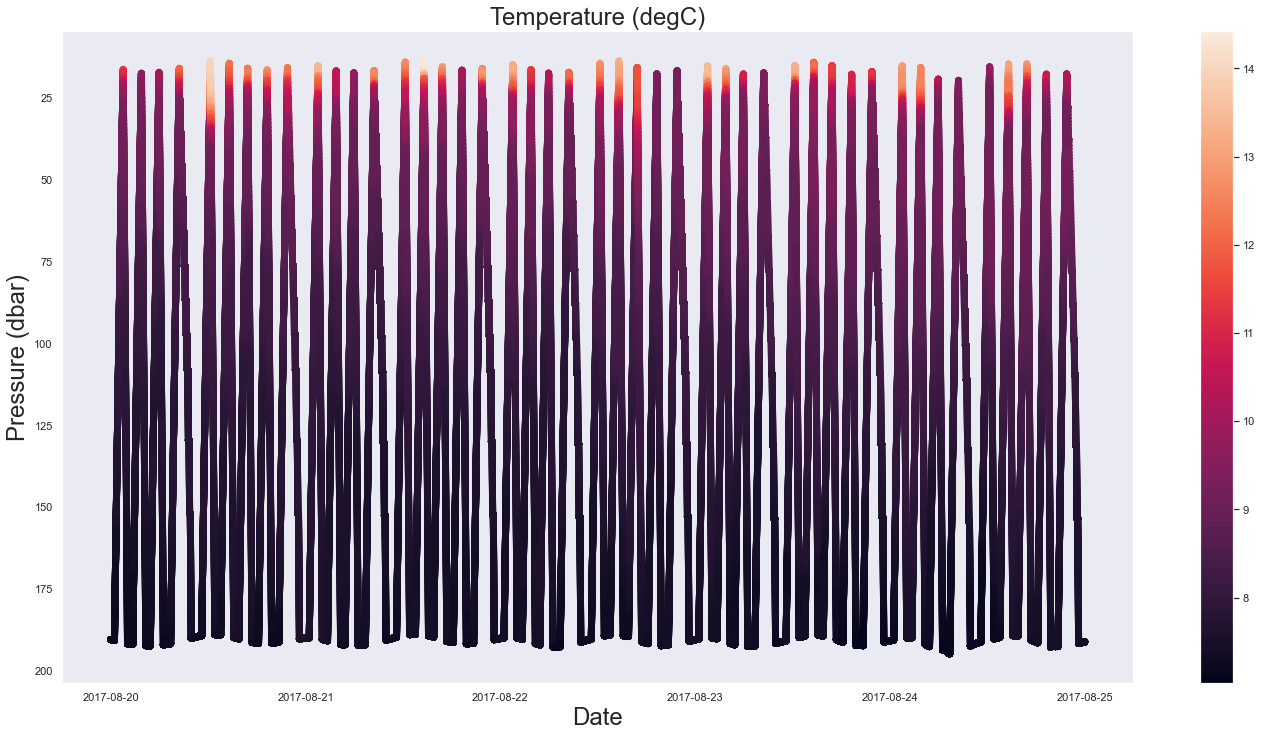

In [38]:
fig, ax = plt.subplots(figsize=(24, 12))

ax.invert_yaxis()
ax.grid()

sc = ax.scatter(profiler_week['time'],profiler_week['seawater_pressure'],c=profiler_week['seawater_temperature'])
ax.set_xlabel('Date', size=24)
ax.set_ylabel('Pressure (dbar)', size=24)
ax.set_title('Temperature (degC)', size=24)
cb = fig.colorbar(sc,ax=ax)

plt.savefig('../figures/CTD_profiler_5days.png')

I hope this visual helps you understand the profiler's trips up and down through the water column! The colors on this plot indicate how temperature changes with depth - warmer near the surface and colder near 200 meters. Theoretically, this temperature pattern should change when there's upwelling of cold water. When there's upwelling, we expect to see cold water closer to the surface! 

Also, did you notice how wavy the bottom edge of the profiler data is? I'm guessing the depth that the profiler can get to changes according to the position of the wire it's on, which might be impacted by tidal cycles. That would mean this wavy pattern is being caused by the daily tides! I think it's so cool that that showed up in this data even though I wasn't looking for it - just another reason that I love working with ocean data!

We can generate similar plots with salinity, dissolved oxygen, and density! Each of these variables should have a similar or identical pattern as the plot above. 

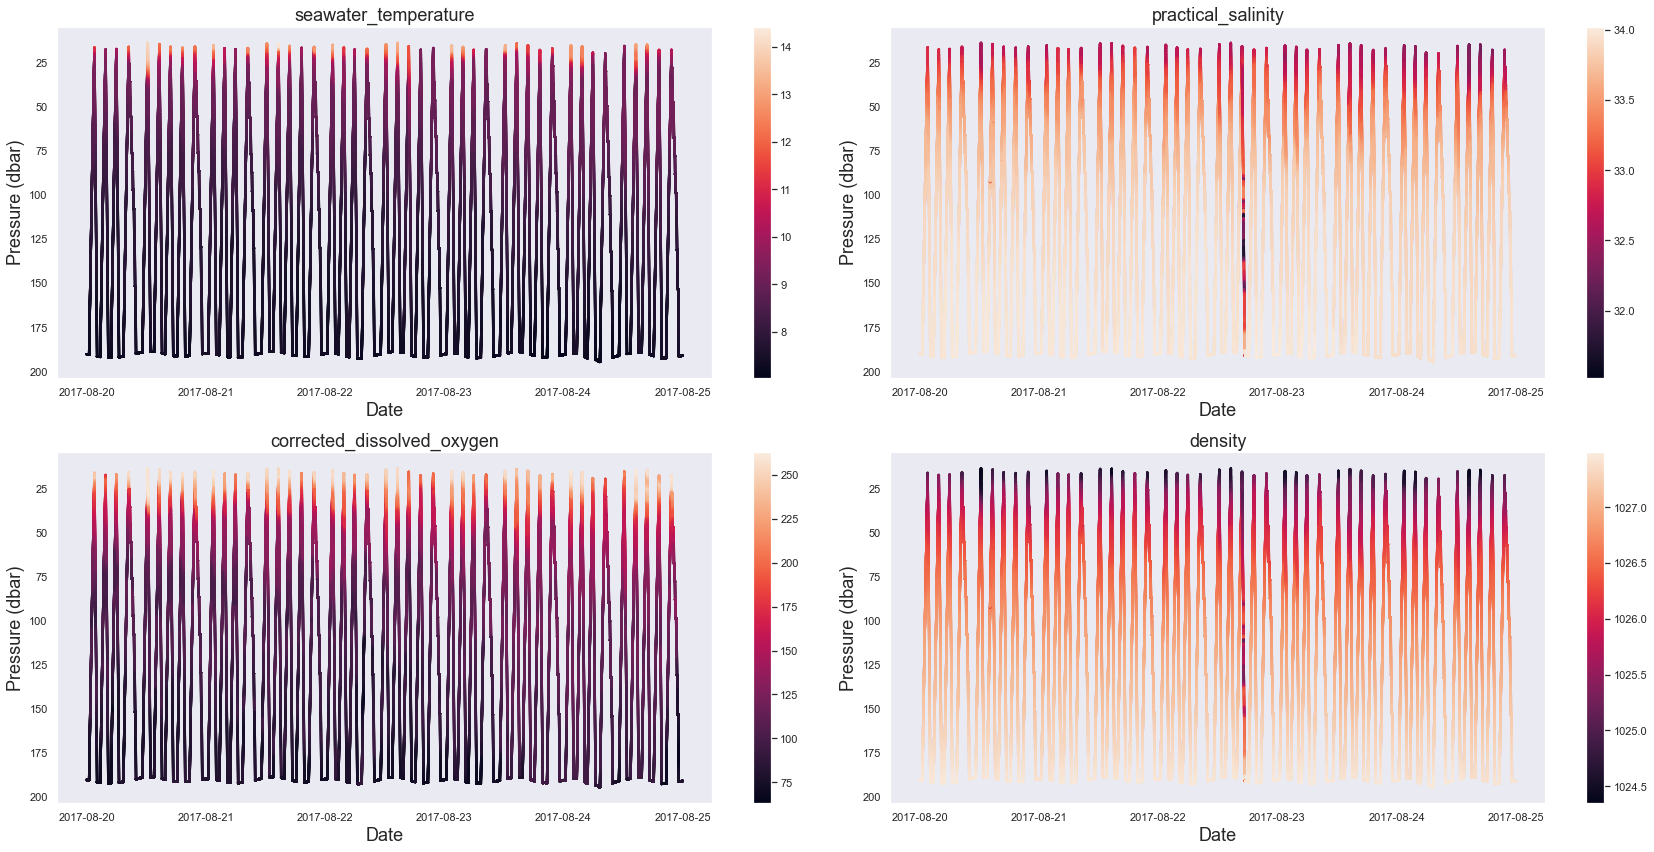

In [39]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 12))

for ax in [ax1, ax2, ax3, ax4]:
    ax.invert_yaxis()
    ax.grid()
    ax.set_xlabel('Date', size=18)
    ax.set_ylabel('Pressure (dbar)', size=18)

#ax1.set_xlim(profiler_week['time'],profiler_week['time'])
sc = ax1.scatter(profiler_week['time'],profiler_week['seawater_pressure'],c=profiler_week['seawater_temperature'], s=2)
cb = fig.colorbar(sc,ax=ax1)
ax1.set_title('seawater_temperature', size=18)

sc = ax2.scatter(profiler_week['time'],profiler_week['seawater_pressure'],c=profiler_week['practical_salinity'], s=2)
cb = fig.colorbar(sc,ax=ax2)
ax2.set_title('practical_salinity', size=18)

sc = ax3.scatter(profiler_week['time'],profiler_week['seawater_pressure'],c=profiler_week['corrected_dissolved_oxygen'], s=2)
cb = fig.colorbar(sc,ax=ax3)
ax3.set_title('corrected_dissolved_oxygen', size=18)

sc = ax4.scatter(profiler_week['time'],profiler_week['seawater_pressure'],c=profiler_week['density'], s=2)
cb = fig.colorbar(sc,ax=ax4)
ax4.set_title('density', size=18)

plt.tight_layout()
plt.savefig('../figures/CTD_profiler_multi.png')

Dissolved oxygen follows the same pattern as temperature (low values at depth, higher values near the surface), and salinity and density are inversed (high values at depth, lower values near the surface). There appears to be some wonky data in the salinity profile, which also shows up in density because density is calculated using temperature and salinity. These are the kinds of odd data points that we might try to clean up before we pass this data to a model.

Next, let's zoom out and look at a couple of the summer months of data.

In [40]:
# Grab times of interest
mask = (profiler_data['time'][:] > '2017-04-01') & (profiler_data['time'] <= '2017-08-01')
profiler_summer = profiler_data.loc[mask]

profiler_summer.shape

(10193079, 6)

Brave enough to plot 10M observations? I'm not! Let's use the 1 minute resampled dataframe we created earlier.

In [41]:
mask = (profiler_minutes['time'][:] > '2017-04-01') & (profiler_minutes['time'] <= '2017-08-01')
profiler_summer_minutes = profiler_minutes.loc[mask]

profiler_summer_minutes.shape

(169898, 6)

In [42]:
profiler_data['seawater_pressure'].describe()

count    2.151748e+07
mean     1.892278e+02
std      3.956323e+01
min      1.355533e+01
25%      2.026819e+02
50%      2.037541e+02
75%      2.044697e+02
max      2.906436e+02
Name: seawater_pressure, dtype: float64

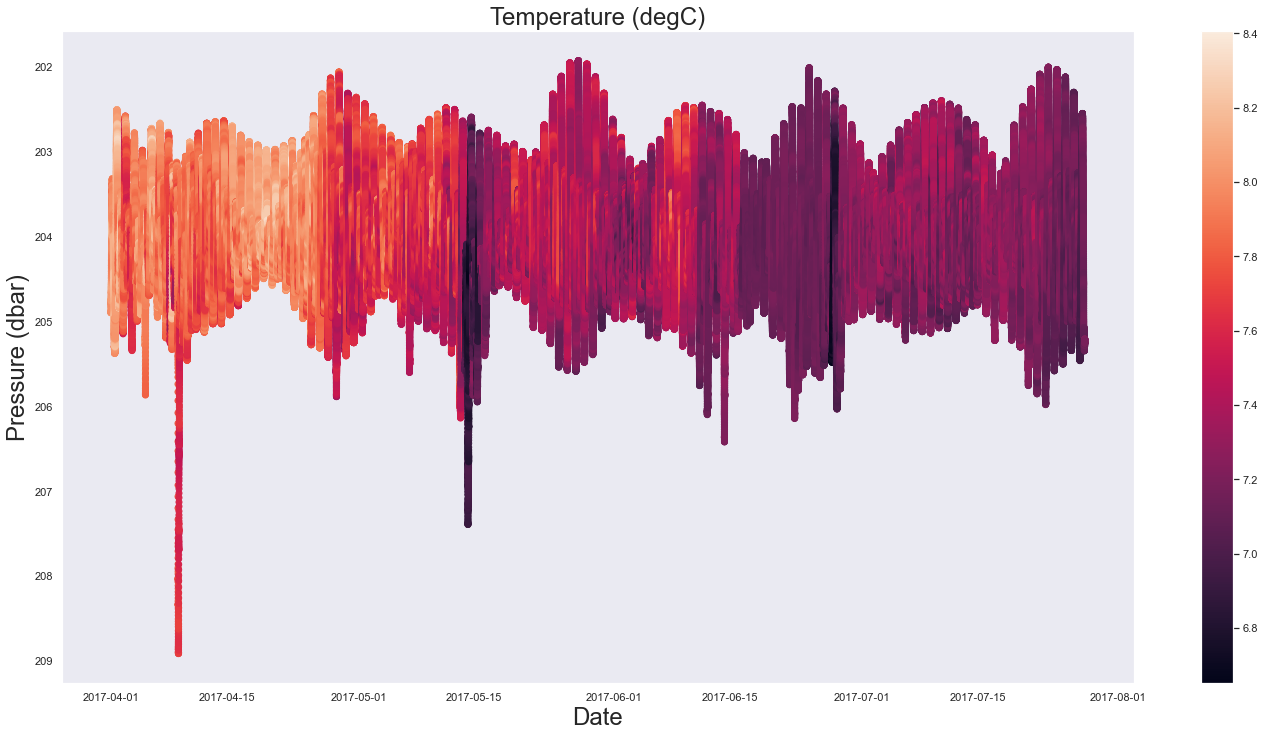

In [43]:
# Now, more complete colored scatter plot, with data plotted
# on a depth vs. time axis.
# source: https://github.com/dgumustel/yodapy/blob/master/examples/yodapy_example_plots.ipynb

fig, ax = plt.subplots(figsize=(24, 12))

# plot temp and salinity curtain plots
ax.invert_yaxis()
ax.grid()
#ax1.set_The xlim(profiler_data['time'],profiler_data['time'])
sc = ax.scatter(profiler_summer_minutes['time'],profiler_summer_minutes['seawater_pressure'],c=profiler_summer_minutes['seawater_temperature'])
ax.set_xlabel('Date', size=24)
ax.set_ylabel('Pressure (dbar)', size=24)
ax.set_title('Temperature (degC)', size=24)
cb = fig.colorbar(sc,ax=ax)

This looks really cool! Unfortuantely, this is from a time period where the profiler was stuck around 200 meters. Let's try looking at the month of August instead.

In [44]:
mask = (profiler_minutes['time'][:] > '2017-08-01') & (profiler_minutes['time'] <= '2017-08-31')
profiler_august_minutes = profiler_minutes.loc[mask]

profiler_august_minutes.shape

(39771, 6)

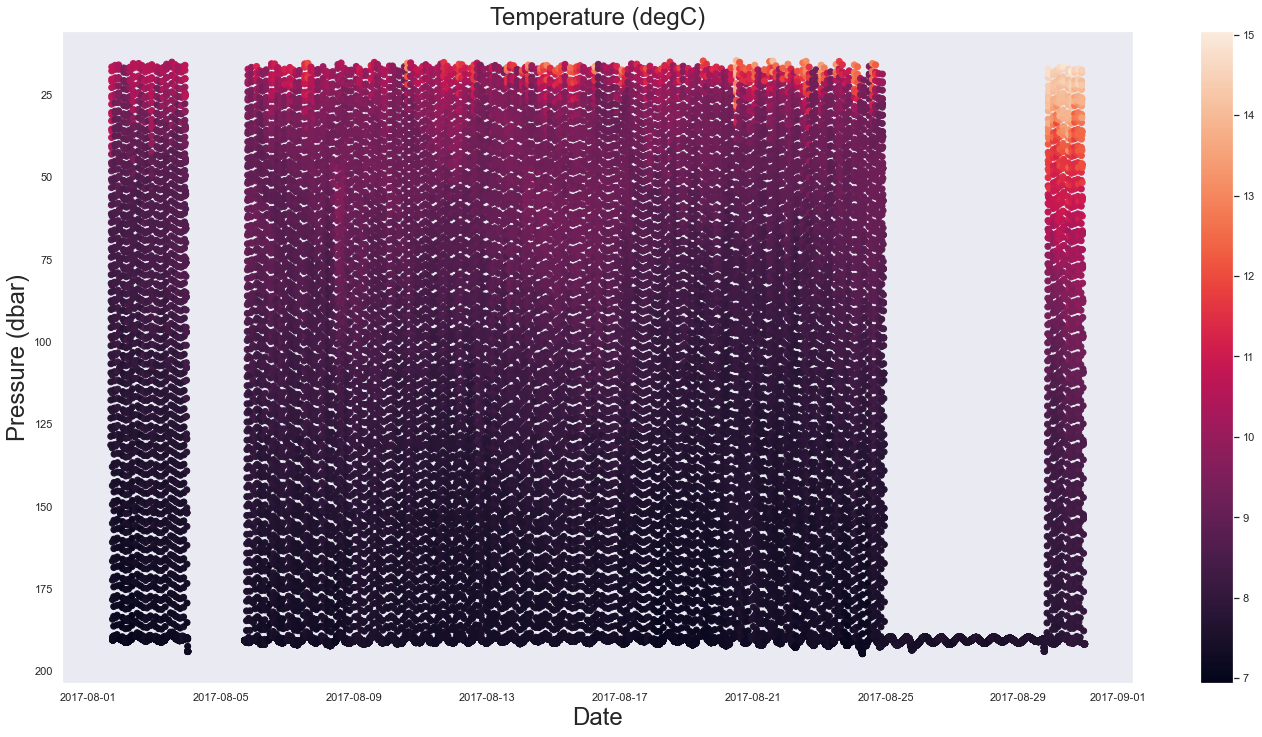

In [45]:
# Now, more complete colored scatter plot, with data plotted
# on a depth vs. time axis.
# source: https://github.com/dgumustel/yodapy/blob/master/examples/yodapy_example_plots.ipynb

fig, ax = plt.subplots(figsize=(24, 12))

# plot temp and salinity curtain plots
ax.invert_yaxis()
ax.grid()
#ax1.set_The xlim(profiler_data['time'],profiler_data['time'])
sc = ax.scatter(profiler_august_minutes['time'],profiler_august_minutes['seawater_pressure'],c=profiler_august_minutes['seawater_temperature'])
ax.set_xlabel('Date', size=24)
ax.set_ylabel('Pressure (dbar)', size=24)
ax.set_title('Temperature (degC)', size=24)
cb = fig.colorbar(sc,ax=ax)

plt.savefig('../figures/CTD_profiler_august_temp.png')

August has much better data availability for the profiler. If only the whole year looked like this! 

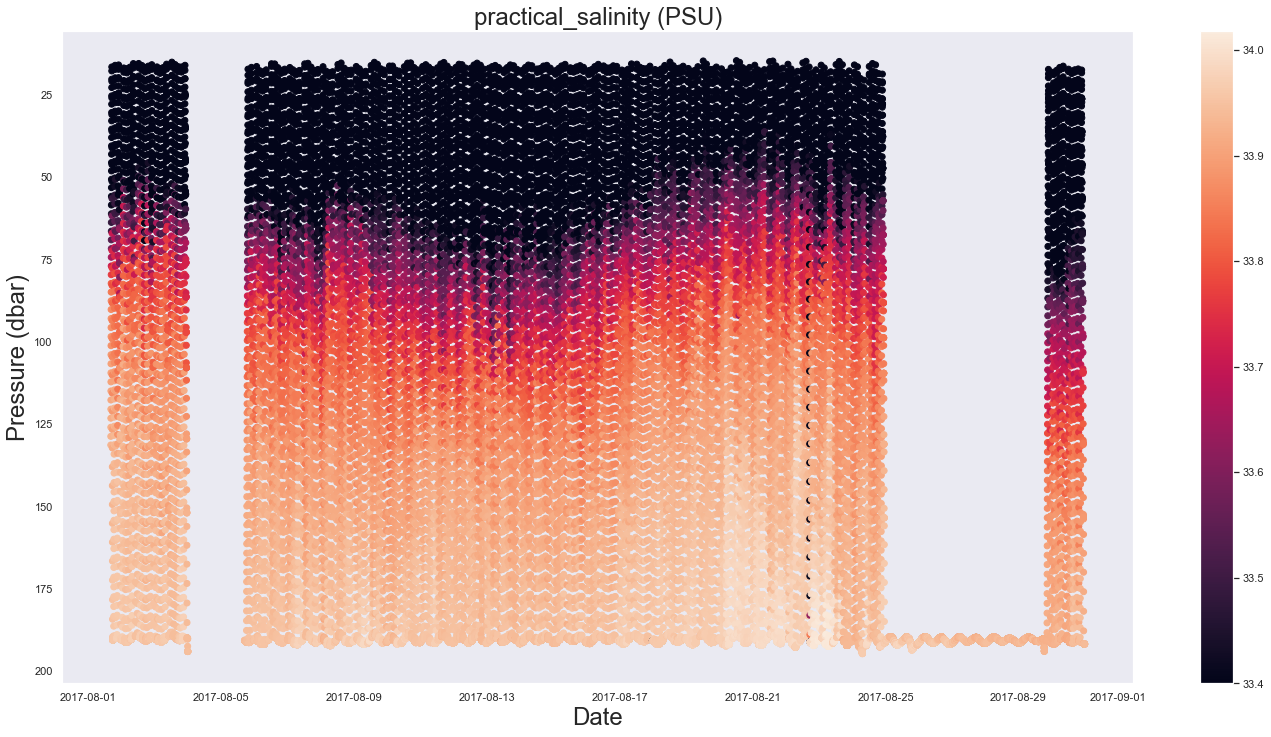

In [46]:
fig, ax = plt.subplots(figsize=(24, 12))

# plot temp and salinity curtain plots
ax.invert_yaxis()
ax.grid()
#ax1.set_xlim(profiler_data['time'],profiler_data['time'])
sc = ax.scatter(profiler_august_minutes['time'],profiler_august_minutes['seawater_pressure'],c=profiler_august_minutes['practical_salinity'], vmin=33.4)
ax.set_xlabel('Date', size=24)
ax.set_ylabel('Pressure (dbar)', size=24)
ax.set_title('practical_salinity (PSU)', size=24)
cb = fig.colorbar(sc,ax=ax)

plt.savefig('../figures/CTD_profiler_salinity.png')

In [47]:
mask = (METBK_hourly['time'][:] > '2017-08-01') & (METBK_hourly['time'] <= '2017-08-31')
METBK_august = METBK_hourly.loc[mask]

METBK_august.shape

(720, 4)

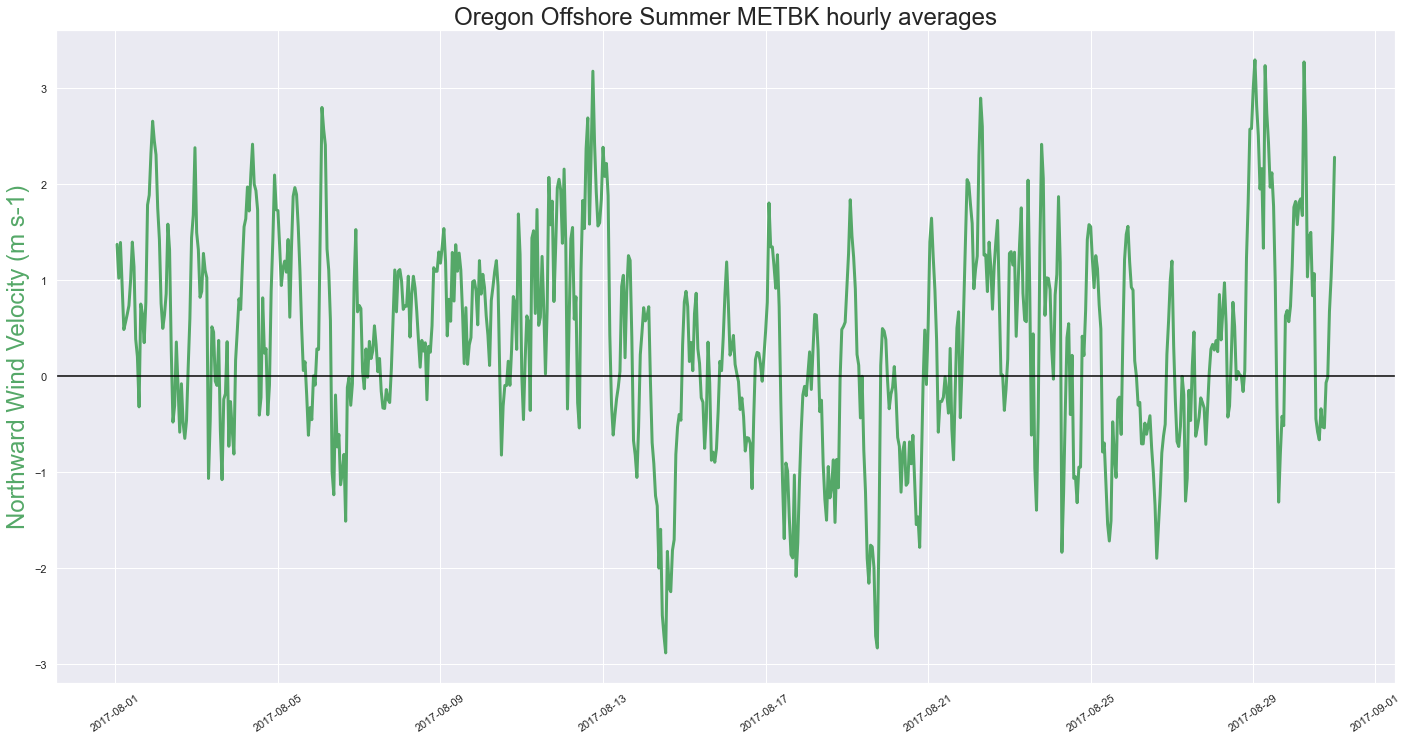

In [48]:
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(METBK_august['time'], METBK_august['met_windavg_mag_corr_east'], 'g', linewidth=3)
ax.set_ylabel('Northward Wind Velocity (m s-1)', color='g', size=24)
plt.xticks(rotation=35)

ax.axhline(y=0, ls='-', c='black') # add horizontal line at 0
ax.set_title('Oregon Offshore Summer METBK hourly averages', size=24);

---
### Platform data

Finally, we can look at the platform data. Hopefully it's more consistent than the profiler data! We'll do all the same steps we've already done - turn time into a datetime, resample, and plot!

In [49]:
platform_data.shape

(21413155, 6)

In [50]:
platform_minutes = platform_data.resample('T', on='time').mean().dropna(how='all').reset_index()

platform_hourly = platform_data.resample('H', on='time').mean().dropna(how='all').reset_index()

platform_daily = platform_data.resample('D', on='time').mean().dropna(how='all').reset_index()

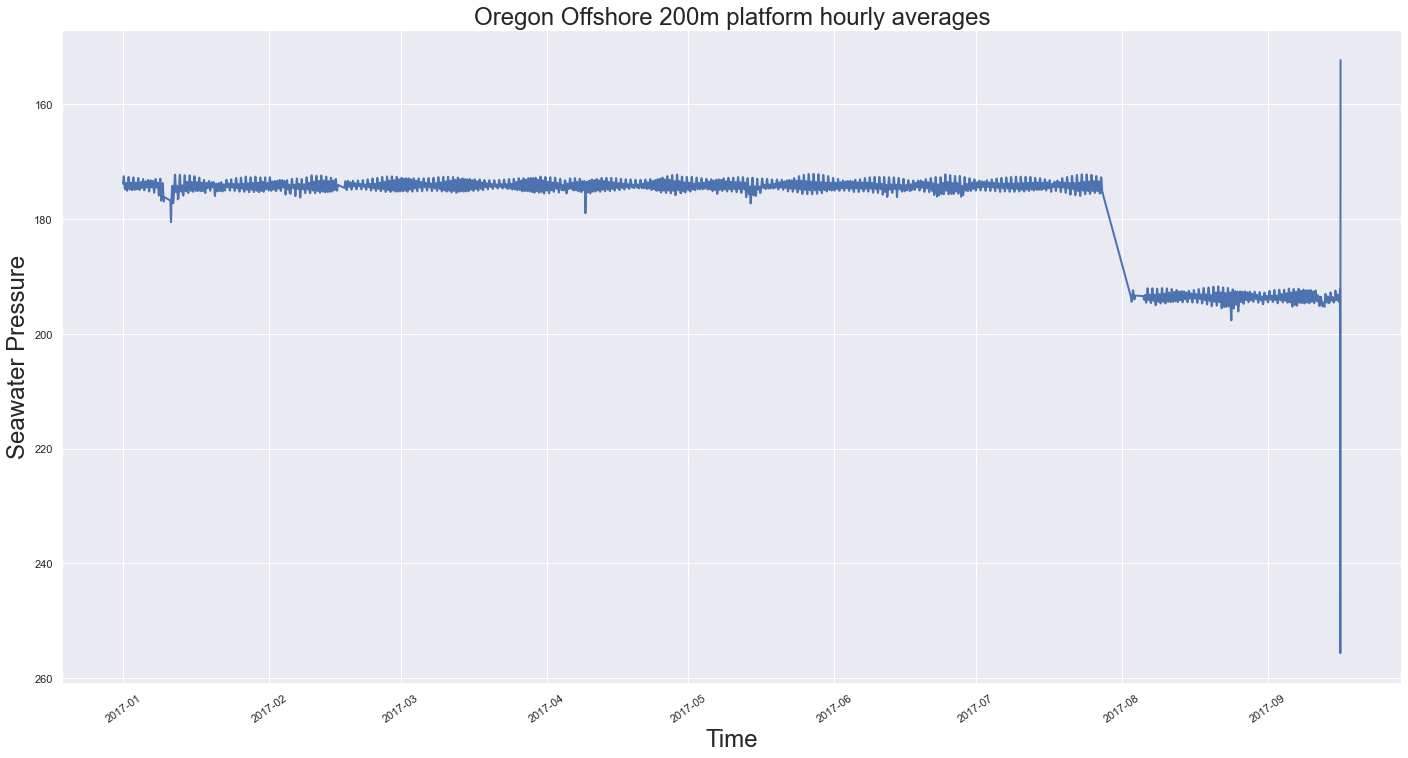

In [51]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(24, 12))
ax.plot(platform_hourly['time'], platform_hourly['seawater_pressure'], 'b', linewidth=2)
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore 200m platform hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

Ahhh, the joys of working with real world data. For some reason, the platform's seawater pressure dropped between July and August from near 170 decibars to near 190 decibars. Let's look at the data anyway.

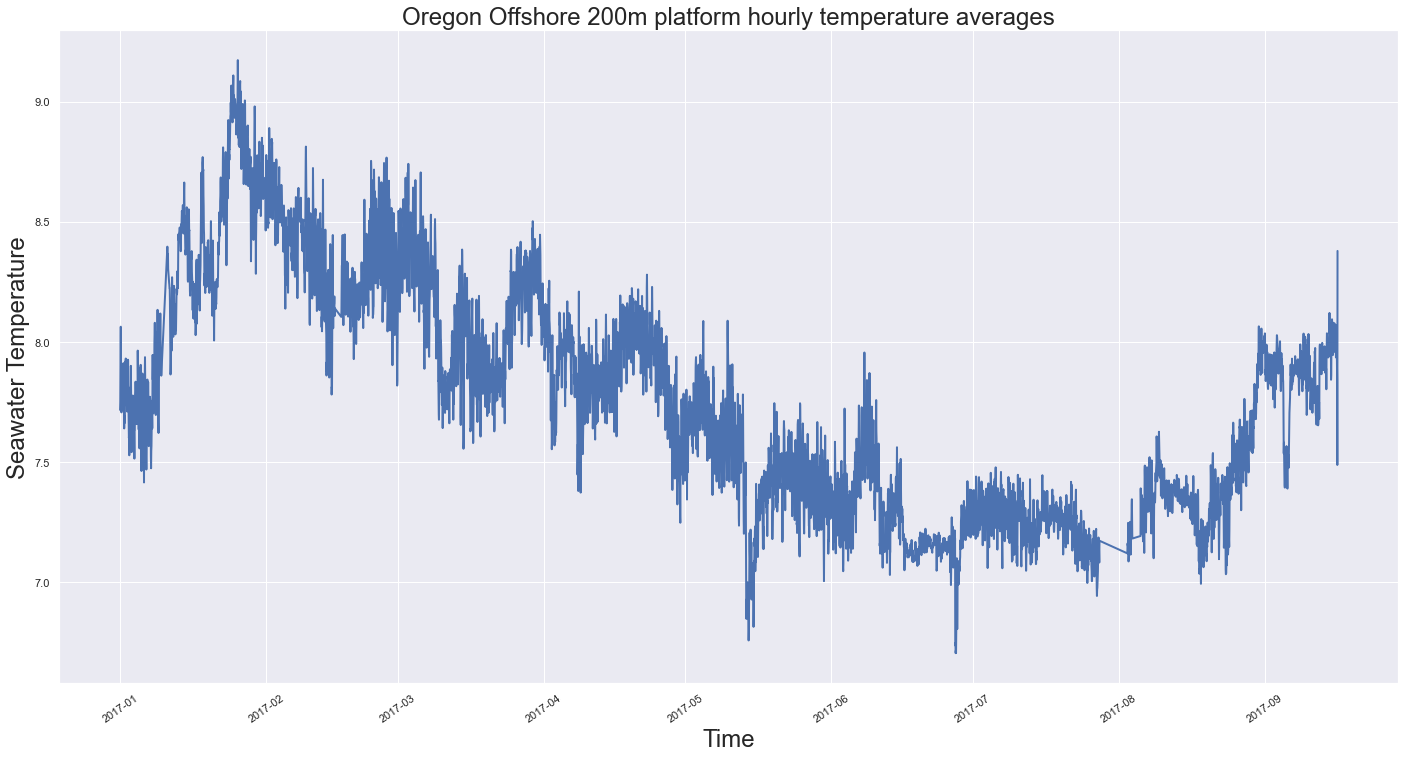

In [52]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(24, 12))
ax.plot(platform_hourly['time'], platform_hourly['seawater_temperature'], 'b', linewidth=2)
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Temperature', size=24)
ax.set_title('Oregon Offshore 200m platform hourly temperature averages', size=24)

plt.xticks(rotation=35);

This is so fascinating! The temperatures in the winter months are actually warmer than in the summer months around a depth of 200 meters. Let's see if the same seasonal changes can be seen in salinity.

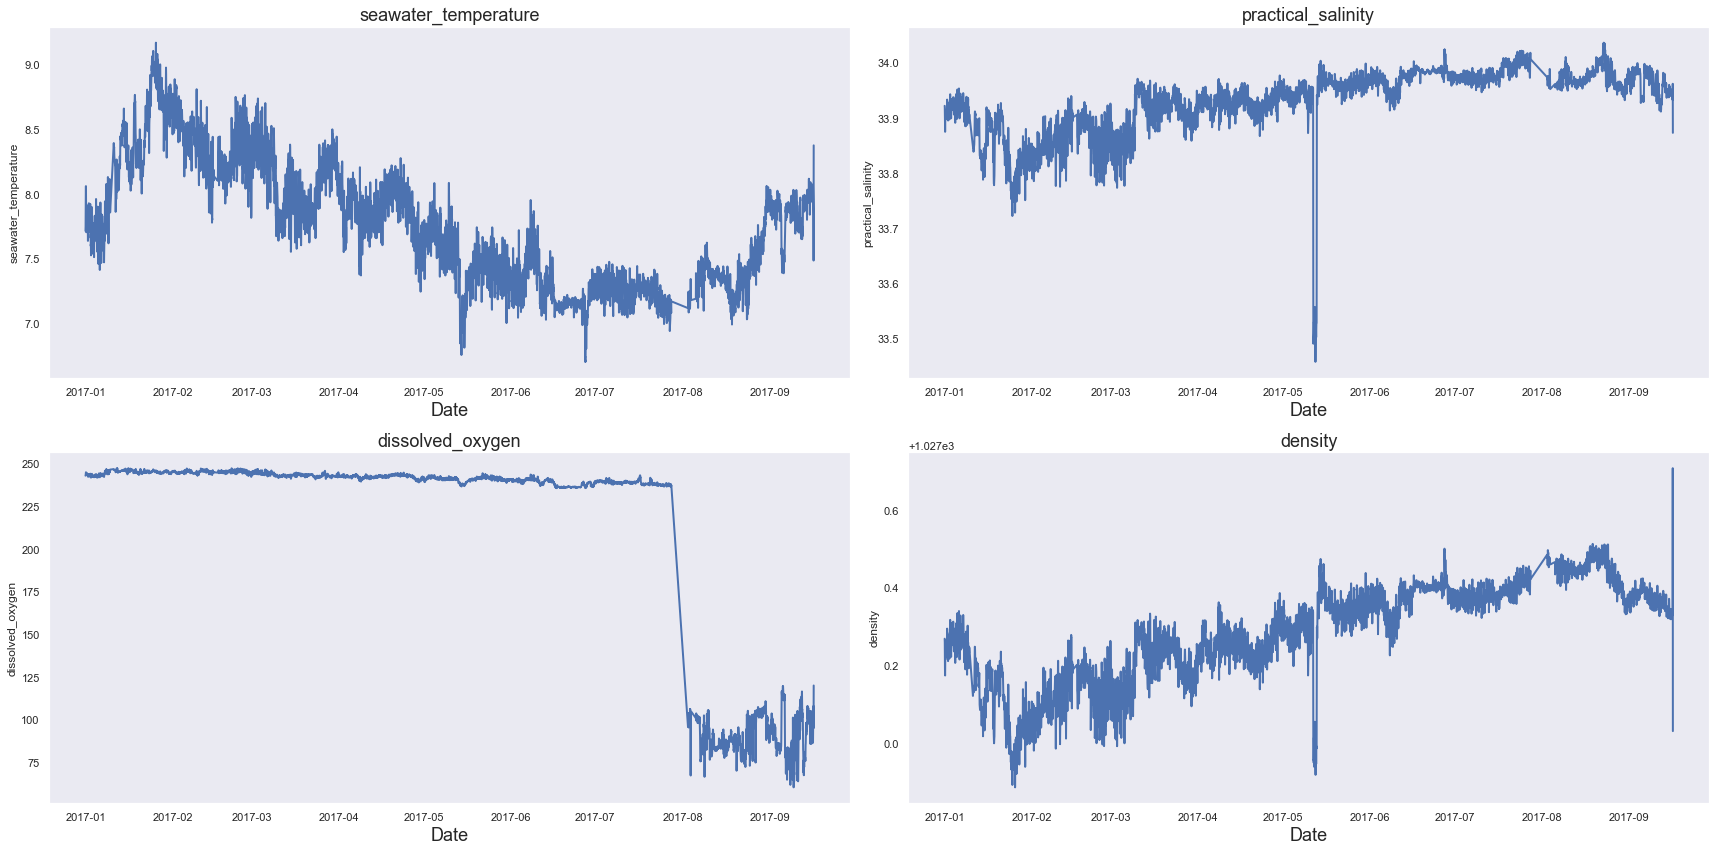

In [53]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 12))

for ax in [ax1, ax2, ax3, ax4]:
    ax.grid()
    ax.set_xlabel('Date', size=18)

#ax1.set_xlim(profiler_week['time'],profiler_week['time'])
ax1.plot(platform_hourly['time'], platform_hourly['seawater_temperature'], 'b', linewidth=2)
ax1.set_title('seawater_temperature', size=18)
ax1.set_ylabel('seawater_temperature')

ax2.plot(platform_hourly['time'], platform_hourly['practical_salinity'], 'b', linewidth=2)
ax2.set_title('practical_salinity', size=18)
ax2.set_ylabel('practical_salinity')

ax3.plot(platform_hourly['time'], platform_hourly['dissolved_oxygen'], 'b', linewidth=2)
ax3.set_title('dissolved_oxygen', size=18)
ax3.set_ylabel('dissolved_oxygen')

ax4.plot(platform_hourly['time'], platform_hourly['density'], 'b', linewidth=2)
ax4.set_title('density', size=18)
ax4.set_ylabel('density')

plt.tight_layout()
plt.savefig('../figures/platform_multi.png')

The dissolved oxygen data looks a bit questionable, but the salinity and density are showing the inverse of the temperature data, just like we'd expect. There appears to be some funky data in May (see large spike downwards in salinity and density plots), but the rest looks okay. 

Another thing we can do is compare the METBK surface mooring data to this platform data. Unfortunately, the surface mooring doesn't have density calculations, so we'll have to compare temperature measurements.

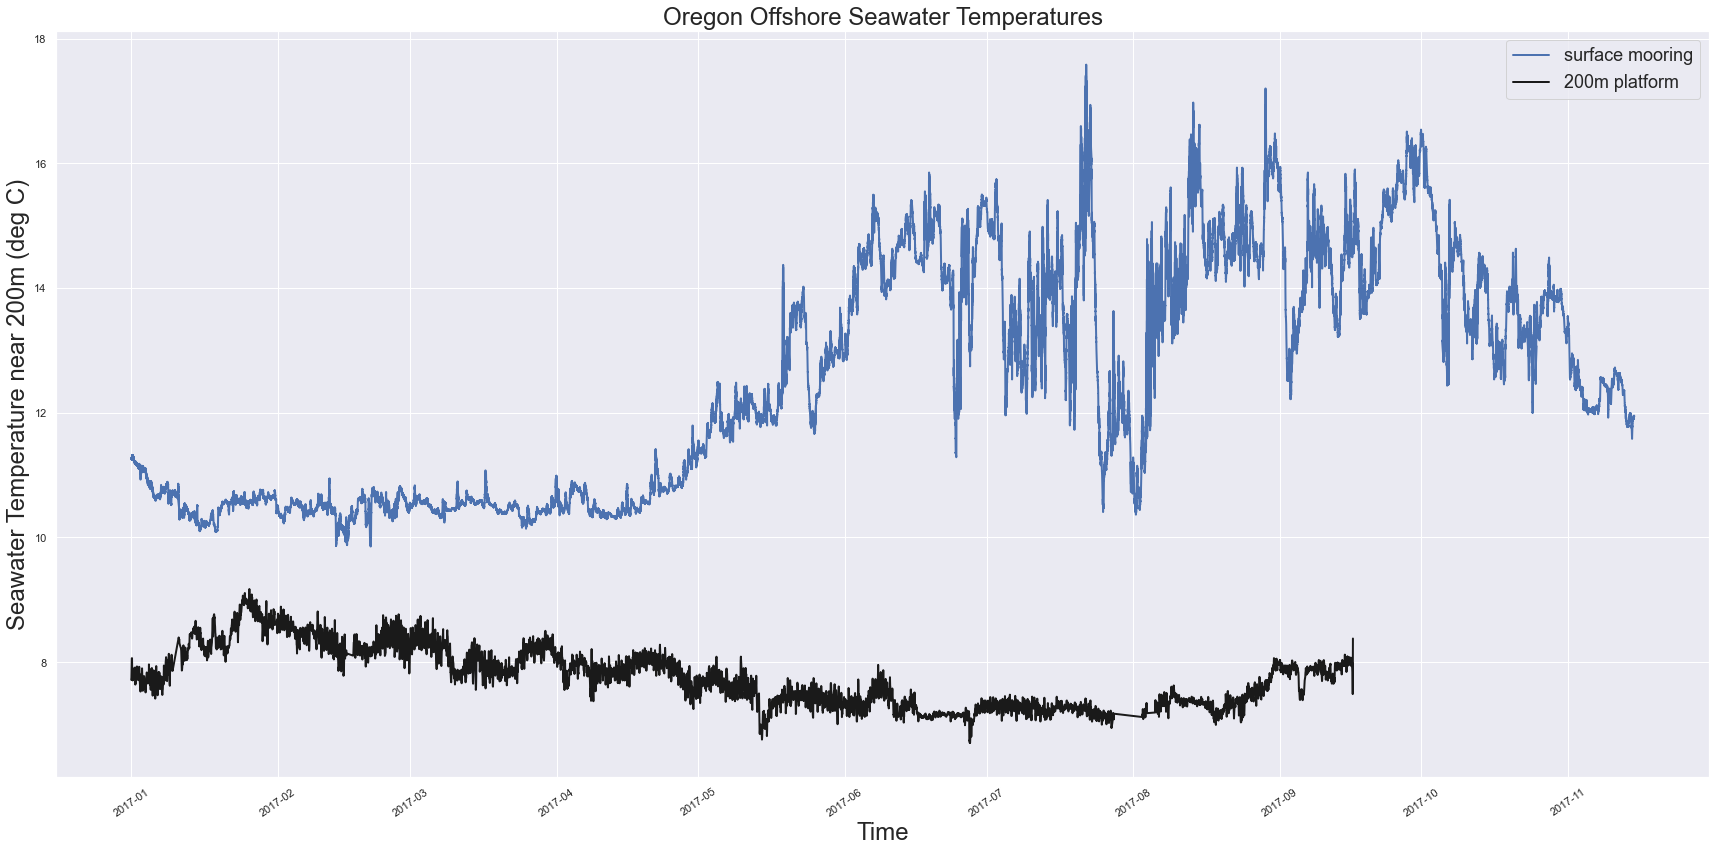

In [54]:
fig, ax = plt.subplots(1,1, sharex=True, figsize = (24, 12)) 

ax.plot(METBK_data['time'], METBK_data['sea_surface_temperature'], 'b', linewidth=2, label='surface mooring')
ax.set_ylabel('Sea Surface Temperature (deg C)', size=24)

ax.plot(platform_hourly['time'], platform_hourly['seawater_temperature'], 'k', linewidth=2, label='200m platform')
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Temperature near 200m (deg C)', size=24)
ax.set_title('Oregon Offshore Seawater Temperatures', size=24)

plt.legend(fontsize=18)
plt.xticks(rotation=35);
plt.tight_layout()
plt.savefig('../figures/platform_METBK.png')

Amazing to see how much more varied the watercolumn is in the summer months than the winter months! 

---
### Pull in upwelling index data

I followed the flowchart [provided here](https://oceanview.pfeg.noaa.gov/products/upwelling/which) to determine which upwelling index to use - I settled for the CUTI index! **You'll need to download the CUTI daily indices csv file [from the ERD](https://oceanview.pfeg.noaa.gov/products/upwelling/dnld) and put it into the coastal upwelling output directory manually.**

The CUTI index data includes a year, month, and day column. We can combine these and parse them as a datetime while reading in the data.

In [55]:
CUTI = pd.read_csv('../../coastal_upwelling_output/CUTI_daily.csv',
                  parse_dates=[[0,1,2]],
                  infer_datetime_format=True)

In [56]:
CUTI.rename(columns={'year_month_day':'time'},inplace=True)

This dataset contains index values for several latitudes along the west coast of North America. The OOI Oregon Offshore site is at 44.3 degree North latitude, so we can use the 44N column, which should cover 43.5 to 44.5 degrees North latitude. 

In [57]:
mask = CUTI['time']
CUTI = CUTI[['time', '44N']]

In [58]:
CUTI

time    44N
0     1988-01-01 -0.043
1     1988-01-02 -0.440
2     1988-01-03 -0.514
3     1988-01-04  0.200
4     1988-01-05 -0.082
...          ...    ...
12139 2021-03-27 -0.011
12140 2021-03-28 -0.392
12141 2021-03-29  0.373
12142 2021-03-30  0.973
12143 2021-03-31  0.888

[12144 rows x 2 columns]

In [59]:
mask = (CUTI['time'][:] > '2017-01-01') & (CUTI['time'] <= '2017-12-01')
CUTI = CUTI.loc[mask].reset_index(drop=True)

In [60]:
CUTI

time    44N
0   2017-01-02  1.308
1   2017-01-03  0.360
2   2017-01-04  0.742
3   2017-01-05  1.469
4   2017-01-06  0.233
..         ...    ...
329 2017-11-27 -0.500
330 2017-11-28 -0.342
331 2017-11-29 -0.243
332 2017-11-30 -0.232
333 2017-12-01 -0.325

[334 rows x 2 columns]

In [61]:
CUTI.describe()

44N
count  334.000000
mean     0.039497
std      0.834892
min     -3.996000
25%     -0.388250
50%      0.104000
75%      0.557750
max      2.517000

In [62]:
CUTI.isna().sum()

time    0
44N     0
dtype: int64

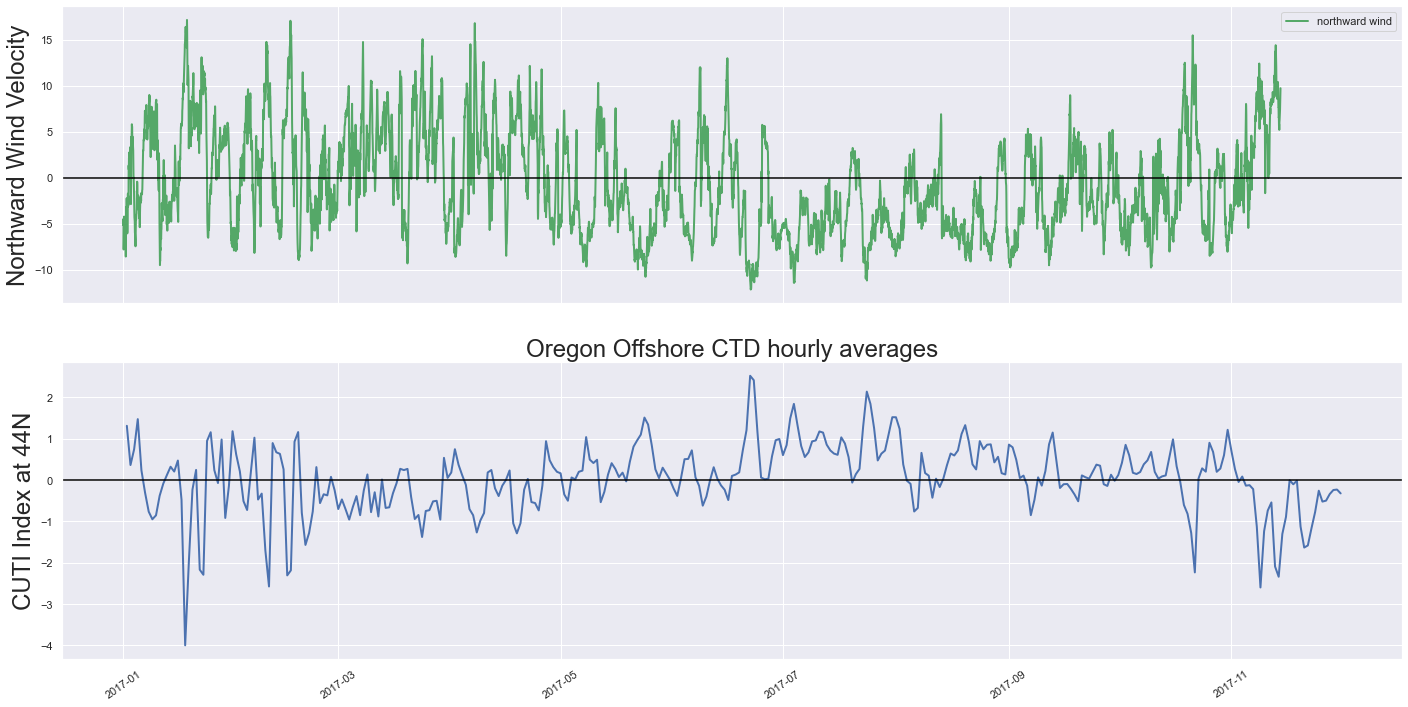

In [63]:
# Plot hourly-averaged METBK data
fig, (ax2, ax1) = plt.subplots(2, 1, sharex=True, figsize=(24, 12))
ax1.plot(CUTI['time'], CUTI['44N'], 'b', linewidth=2)
ax1.set_xlabel('')
ax1.set_ylabel('CUTI Index at 44N', size=24)
ax1.set_title('Oregon Offshore CTD hourly averages', size=24)
ax1.axhline(y=0, ls='-', c='black') # add horizontal line at 0

#ax2.plot(METBK_hourly['time'], METBK_hourly['Eastward Wind Velocity (m s-1)'], 'c', label='eastward wind')
ax2.plot(METBK_hourly['time'], METBK_hourly['met_windavg_mag_corr_north'], 'g', label='northward wind', linewidth=2)
ax2.set_ylabel('Northward Wind Velocity', size=24)
ax2.legend()
ax2.axhline(y=0, ls='-', c='black') # add horizontal line at 0

plt.xticks(rotation=35);

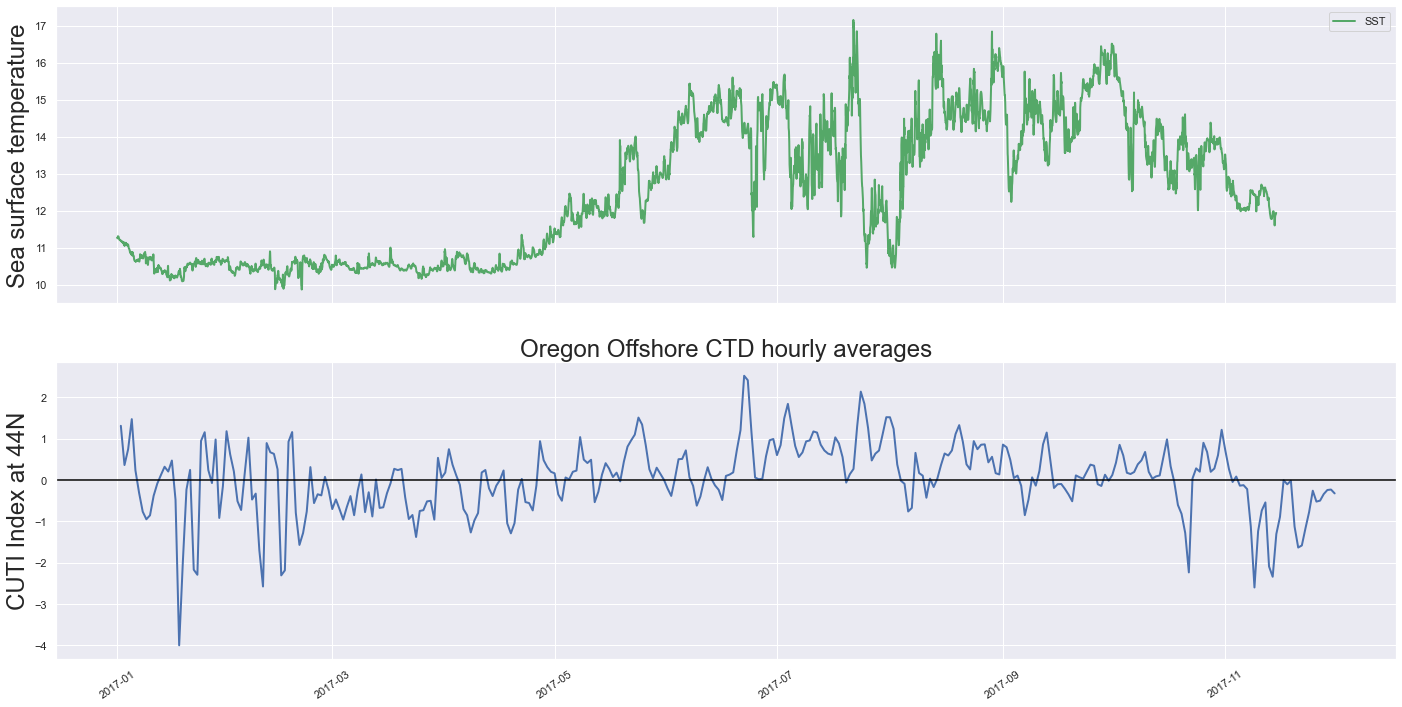

In [64]:
# Plot hourly-averaged METBK data
fig, (ax2, ax1) = plt.subplots(2, 1, sharex=True, figsize=(24, 12))
ax1.plot(CUTI['time'], CUTI['44N'], 'b', linewidth=2)
ax1.set_xlabel('')
ax1.set_ylabel('CUTI Index at 44N', size=24)
ax1.set_title('Oregon Offshore CTD hourly averages', size=24)
ax1.axhline(y=0, ls='-', c='black') # add horizontal line at 0

#ax2.plot(METBK_hourly['time'], METBK_hourly['Eastward Wind Velocity (m s-1)'], 'c', label='eastward wind')
ax2.plot(METBK_hourly['time'], METBK_hourly['sea_surface_temperature'], 'g', label='SST', linewidth=2)
ax2.set_ylabel('Sea surface temperature', size=24)
ax2.legend()

plt.xticks(rotation=35);

Nice place to explore CUTI data: https://heatherwelch.shinyapps.io/shiny_jacox_cuti/

In [65]:
for var in profiler_var:
    n_obs = len(profiler_daily[var])
    correlation = CUTI['44N'][:n_obs].corr(profiler_daily[var])
    print(f'CUTI correlation with profiler {var} is', round(correlation, 4))

CUTI correlation with profiler seawater_pressure is -0.1241
CUTI correlation with profiler density is 0.0783
CUTI correlation with profiler practical_salinity is 0.1044
CUTI correlation with profiler seawater_temperature is -0.2941
CUTI correlation with profiler corrected_dissolved_oxygen is -0.2436


In [66]:
for var in platform_var:
    n_obs = len(platform_daily[var])
    correlation = CUTI['44N'][:n_obs].corr(platform_daily[var])
    print(f'CUTI correlation with platform {var} is', round(correlation, 4))

CUTI correlation with platform seawater_pressure is 0.1548
CUTI correlation with platform density is 0.428
CUTI correlation with platform practical_salinity is 0.3748
CUTI correlation with platform seawater_temperature is -0.4392
CUTI correlation with platform dissolved_oxygen is -0.1738


In [67]:
for var in METBK_var:
    n_obs = len(METBK_daily[var])
    correlation = CUTI['44N'][:n_obs].corr(METBK_daily[var])
    print(f'CUTI correlation with surface mooring {var} is', round(correlation, 4))

CUTI correlation with surface mooring sea_surface_temperature is 0.36
CUTI correlation with surface mooring met_windavg_mag_corr_east is -0.1754
CUTI correlation with surface mooring met_windavg_mag_corr_north is -0.7704


In [68]:
n_obs = len(profiler_daily['seawater_temperature'])
correlation = CUTI['44N'][:n_obs].corr(profiler_daily['seawater_temperature'])


In [69]:
CUTI.corrwith(profiler_daily['seawater_temperature'])

44N   -0.294074
dtype: float64

--- 
### Save data for modeling

**Be careful saving this data!**

It can save a lot of time BUT it's very easy to accidentally overwrite something that you really needed! 

In [70]:
# METBK_data_copy.to_csv('METBK_01-01_12-01.csv', index=False)
# CTD_data_copy.to_csv('CTD_01-01_09-16.csv', index=False)

List of dataframes created here: 

'CTD_daily',
'CTD_data',
'CTD_data_copy',
'CTD_hourly',
'CTD_minutes',
'CTD_summer',
'CTD_summer_minutes',
'CTD_week',


'METBK_daily',
'METBK_data',
'METBK_data_copy',
'METBK_hourly',
'METBK_minutes',
'METBK_summer_data',
'METBK_summer_minutes'

In [73]:
# CTD_five_minutes = CTD_data.resample('5T', on='time').mean().dropna(how='all').reset_index()
# METBK_five_minutes = METBK_data_copy.resample('5T', on='time').mean().dropna(how='all').reset_index()

In [ ]:
# ds_list = [CTD_daily, CTD_data, CTD_data_copy, CTD_hourly, CTD_minutes, 
#             CTD_summer, CTD_summer_minutes, CTD_week, CTD_five_minutes, 
#             METBK_daily, METBK_data, METBK_data_copy, METBK_hourly, METBK_minutes, 
#             METBK_summer_data, METBK_summer_minutes, METBK_five_minutes]

# for ds in ds_list:
#     print(ds.shape)

In [ ]:
# CTD_daily.to_csv('CTD_daily.csv', index=False)
# METBK_daily.to_csv('METBK_daily.csv', index=False)

In [ ]:
# CTD_five_minutes.to_csv('CTD_five_minutes.csv', index=False)
# METBK_five_minutes.to_csv('METBK_five_minutes.csv', index=False)

In [ ]:
# cuti.to_csv('cuti.csv', index=False)

In [ ]:
# dir()

In [ ]:
# METBK_hourly.to_csv('METBK_03-01_06_30.csv', index=False)
# CTD_data.to_csv('CTD_03-01_06_30.csv', index=False)

Need to evaluate all the dataframes I've made here and choose which ones I want to carry over to the modeling.